In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

### StreetEasy Rentals dataset. 
Data sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

In [3]:
raw_df = pd.read_csv('/Users/angelika/Desktop/data science prep/streeteasy.csv', index_col=0)


In [4]:
raw_df.head(5).transpose()

rental_id,1545,2472,10234,2919,2790
building_id,44518357,94441623,87632265,76909719,92953520
rent,2550,11500,3000,4500,4795
bedrooms,0,2,3,1,1
bathrooms,1,2,1,1,1
size_sqft,480,2000,1000,916,975
min_to_subway,9,4,4,2,3
floor,2,1,1,51,8
building_age_yrs,17,96,106,29,31
no_fee,1,0,0,0,0
has_roofdeck,1,0,0,1,0


In [5]:
raw_df.sample(5)

,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
rental_id,,,,,,,,,,,,,,,,,,,
6897,71369765,2695,0.0,1,440,3,19.0,37,0,0,0,1,1,0,0,1,Midtown,All Midtown,Manhattan
8728,76260672,3095,2.0,2,1001,3,5.0,74,1,0,0,0,0,0,0,0,Sunnyside,Northwest Queens,Queens
1405,23741299,5195,2.0,2,1085,6,4.0,8,1,0,1,0,0,0,0,0,Williamsburg,North Brooklyn,Brooklyn
7060,47570654,2695,0.0,1,375,4,21.0,108,1,0,0,0,0,0,0,0,Financial District,All Downtown,Manhattan
9023,27404787,3375,2.0,1,800,6,4.0,106,0,0,0,0,0,0,0,0,Upper West Side,All Upper West Side,Manhattan


### Data Exploration For target variable (Rent)
Trying to find interesting or surprising patterns about the data

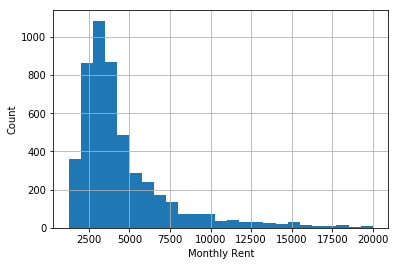

In [6]:
_ = raw_df.rent.hist(bins=25)
_ = plt.xlabel('Monthly Rent')
_ = plt.ylabel('Count')

In [7]:
print("Skewness: %f" % raw_df['rent'].skew())
print("Kurtosis: %f" % raw_df['rent'].kurt())

Skewness: 2.268812
Kurtosis: 6.056724


From the histogram we can see that the distribution is skewed to the right and we have some outliers for higher prices.
Nevertheless, skewness and kurtosis values are acceptable so for now I'll keep the data as it is
but will keep in mind higher price outliers.

In [8]:
raw_df.describe()

,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Exploration
Consider what variables are the most important in order to build a prediction model on targer variable (rent).
#### Things to consider:
* How many variables are there?
* What variables make most sense to use from an intuitive standpoint?
* What varibales have the highest correlation with rent varialbe? 

In [9]:
print(list(raw_df))
print()

raw_df.info()

['building_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood', 'submarket', 'borough']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1545 to 4718
Data columns (total 19 columns):
building_id         5000 non-null int64
rent                5000 non-null int64
bedrooms            5000 non-null float64
bathrooms           5000 non-null int64
size_sqft           5000 non-null int64
min_to_subway       5000 non-null int64
floor               5000 non-null float64
building_age_yrs    5000 non-null int64
no_fee              5000 non-null int64
has_roofdeck        5000 non-null int64
has_washer_dryer    5000 non-null int64
has_doorman         5000 non-null int64
has_elevator        5000 non-null int64
has_dishwasher      5000 non-null int64
has_patio           5000 non-null int64
has_gym           

In [10]:
raw_df.corr()["rent"].sort_values(ascending = False)[1:]

size_sqft           0.808784
bathrooms           0.733644
bedrooms            0.531200
floor               0.272351
has_elevator        0.120822
has_doorman         0.099106
has_dishwasher      0.096631
has_washer_dryer    0.096136
has_gym             0.093737
has_roofdeck        0.081286
has_patio           0.058260
min_to_subway       0.003652
building_id        -0.001235
no_fee             -0.091769
building_age_yrs   -0.122302
Name: rent, dtype: float64

Sems like size_sqft, bathrooms and floor have the highest impact on rent price 
(I am gouing to omit bedrooms for now because of obvious multicollinearity between bedrooms and bathrooms).
Let's explore each variable on a deeper level.



## Scatterplots
Create a scatterplot of size_sqft, bathrooms, and floor.

What are their relationship? 
Is it positive or negative? Linear? Non-linear?

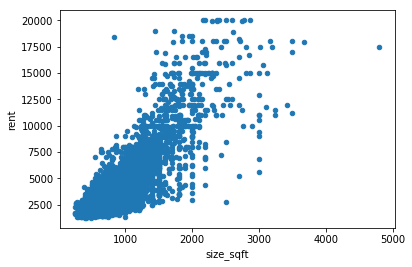

In [11]:
_ = raw_df.plot.scatter('size_sqft', 'rent')

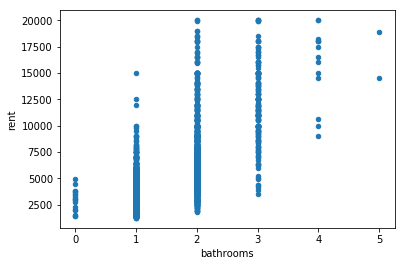

In [12]:
_ = raw_df.plot.scatter('bathrooms', 'rent')

Obviously rent is higher when # of bathrooms is higher. 
This plot also demonstartes 2 abnormalities for 5 bathroom apartments. Their price is lower than some of 4,3 or even 2 bedrooms. This indicates that bethrooms is not the only factor that significantly influences the rent price. 

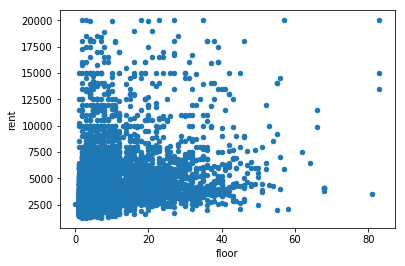

In [13]:
_ = raw_df.plot.scatter('floor', 'rent')

### Fidings: 
I found out some varibales with high correlation to rent as well as their relationship.
For example, size_sqft definitely has a positive lianear relationship with label variable (rent) and their correlation is quiet high.
Lets's explore its impact on a deeper level by constructing simple linear regression model.

### Model
### Single variable Linear Regression with statsmodels:
* Calculate slope and interscept 
* Create a plot

In [14]:
raw_df.isnull().sum()

building_id         0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
submarket           0
borough             0
dtype: int64

Luckily I don't have to worry about null values and can jump into biulding a model right away

In [15]:
slope, intercept = np.polyfit(raw_df.size_sqft, raw_df.rent, 1)
print('slope: %0.3f, intercept: %0.1f' % (slope, intercept))

slope: 5.384, intercept: -416.6


In [16]:
print('Now I can calculate what would be the rent price for 700 square fit apartment: $%0.2f' 
      % (slope * 700 + intercept))

Now I can calculate what would be the rent price for 700 square fit apartment: $3351.98


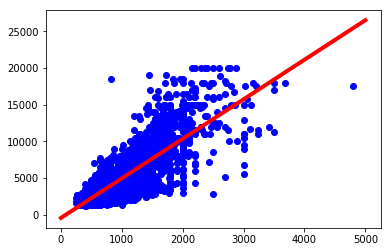

In [17]:
_ = plt.plot(raw_df.size_sqft, raw_df.rent, color='blue', marker='.', markersize=12, linestyle='none')
_ = plt.plot([0, 5000], [intercept, intercept + slope * 5000],  color='red', linewidth=4)
_ = plt.title('')

In [18]:
raw_df.size_sqft.describe()

count    5000.000000
mean      920.101400
std       440.150464
min       250.000000
25%       633.000000
50%       800.000000
75%      1094.000000
max      4800.000000
Name: size_sqft, dtype: float64

The line looks decent visually but lets check how accurate is it 
by calculating rent residual between predicted and actual rent values 
as well as constructing OSL (Ordinary Least Squares).

In [19]:
raw_df['rent_predicted'] = raw_df['rent'] * slope + intercept
raw_df['rent_residual'] = raw_df['rent_predicted'] - raw_df['rent']

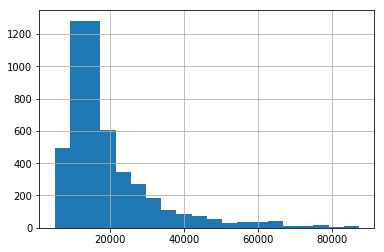

In [20]:
raw_df['rent_residual'].hist(bins=20)

In [21]:
raw_df = sm.add_constant(raw_df)

est = sm.OLS(raw_df['rent'], 
             raw_df[['const', 'size_sqft']]
            ).fit()
print(est.summary())# Add a constant to our existing dataframe for modeling purposes

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     9453.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:12:51   Log-Likelihood:                -44353.
No. Observations:                5000   AIC:                         8.871e+04
Df Residuals:                    4998   BIC:                         8.872e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -416.5609     56.478     -7.376      0.0

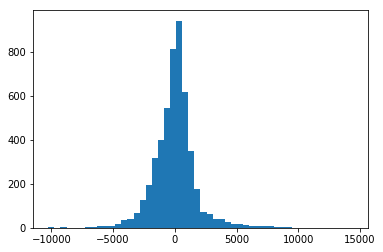

In [22]:
# histogram on the rent residuals based on one atrribute (size_sqft)
_ = plt.hist(est.resid, bins=50)

As we can see our const and size_sqft coef variables are almost identical to the ones 
we predicted before by the use of numpy polyfit function.
R-squared and Adjusted R-Squared are both 0.654 which is considered to have a moderate effect size.
P value is 0 which is also good (this indicates that there is 0% that that the result 
would have come up in a random distribution).


I achived some decent results on rent prediction. However, I can not but wonder whether I can do better by putting to use more than one predicting variable.

### Multiple Linear Regression with statsmodels

Let's try to use statsmodels and OLS again but introduce more variables to the model.
Using brut forth approach I encountered that the best Adj R-squared value comes up for 'size_sqft', 'bathrooms', 'floor', 'has_elevator' variables used together. 

In [23]:
est = sm.OLS(raw_df['rent'], 
             raw_df[['const', 'size_sqft', 'bathrooms', 'floor', 'has_elevator']]
            ).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3170.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:12:51   Log-Likelihood:                -43848.
No. Observations:                5000   AIC:                         8.771e+04
Df Residuals:                    4995   BIC:                         8.774e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1378.3707     59.167    -23.296   

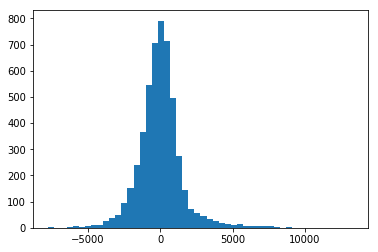

In [24]:
_ = plt.hist(est.resid, bins=50)

R-squared and Adjusted R-Squared values from OLS are both 0.717 which is higher than before. In addition, Histogram for rent residuals is more uniformal than in the previous case what indicates that our model is indeed more accurate.

The outcome is pretty good but let's use sklearn library and see what result can I achieve with it. 

### Using sklearn for Multiple Linear Regression


In [25]:
# Creating a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

I am going to utilize lm.fit() function which estimates the coefficients of the linear regression using least squares.


In [26]:
# Using sensible subset of predictors to fit linear regression model
dependent_vars = ['bedrooms', 'bathrooms', 'min_to_subway', 'floor', 
                  'building_age_yrs', 'no_fee', 'has_roofdeck', 
                  'has_washer_dryer', 'has_doorman', 'has_elevator', 
                  'has_dishwasher', 'has_gym']

X = raw_df[dependent_vars]

lm.fit(X, raw_df.rent)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Next I am going to estimate intercept and coefficients.
Let's look at the estimated coefficients from the linear model using lm.intercept_ and lm.coef_.





In [27]:
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: -516.420593858
Number of coefficients: 12


In this example, the intercept is approximately -516.42, and
this is the value of the predicted response when x1 = x2 ... xn = 0

In [28]:
# The coefficients
pd.DataFrame(lm.coef_, index=dependent_vars,  columns = ['Est. Coefficient'])

,Est. Coefficient
bedrooms,418.199288
bathrooms,3170.238850
min_to_subway,-22.612945
floor,49.073079
building_age_yrs,-1.477977
no_fee,-343.001863
has_roofdeck,-6.841426
has_washer_dryer,187.474859
has_doorman,-43.305667
has_elevator,401.078711


Now i can predict rent prices using lm.predict

In [29]:
# first 8 predicted prices
lm.predict(X)[0:8]

array([ 2621.28204089,  6477.19123116,  3710.37190376,  5981.8101549 ,
        3755.44342157,  6672.10476024,  3073.95178035,  6992.40170342])

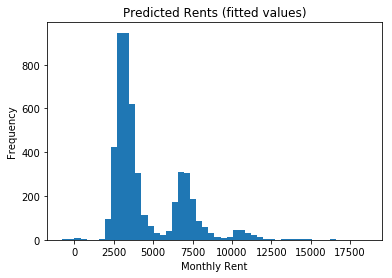

In [30]:
_ = plt.hist(lm.predict(X), bins=50)
_ = plt.title('Predicted Rents (fitted values)')
_ = plt.xlabel('Monthly Rent')
_ = plt.ylabel('Frequency')


Let's plot the true prices compared to the predicted prices to see how they disagree.

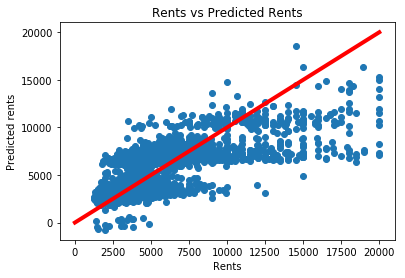

In [31]:
_ = plt.scatter(raw_df['rent'], lm.predict(X))
_ = plt.xlabel("Rents")
_ = plt.ylabel("Predicted rents")
_ = plt.title("Rents vs Predicted Rents")
_ = plt.plot([0, 20000], [0, 20000], linewidth=4, color='red')

It is not the best model but it is decent. It has some under performance when the rental prices increaces. This is likely because there are not too many in that range. However, for the lower rent prices model is quite reliable.

### Conclusion:
Both statsmodels and sklearn modules produces satisfying results. 
However, for more complex datasets I would use sklearn as it gives a little more flexibility around accessing and using the output, and also plays nice with modeling options beyond linear regression.

Things to work on: use feature engineering and apply model on data based on different boroughs.

### Using sklearn on datasets splitted by borough

In [58]:
df_by_borough = raw_df.groupby("borough").describe().head().transpose()
print(df_by_borough)

borough                     Brooklyn     Manhattan        Queens
bathrooms        count  1.013000e+03  3.539000e+03  4.480000e+02
                 mean   1.234946e+00  1.366770e+00  1.160714e+00
                 std    4.747403e-01  5.995882e-01  4.025327e-01
                 min    0.000000e+00  0.000000e+00  0.000000e+00
                 25%    1.000000e+00  1.000000e+00  1.000000e+00
                 50%    1.000000e+00  1.000000e+00  1.000000e+00
                 75%    1.000000e+00  2.000000e+00  1.000000e+00
                 max    4.000000e+00  5.000000e+00  3.000000e+00
bedrooms         count  1.013000e+03  3.539000e+03  4.480000e+02
                 mean   1.578973e+00  1.351936e+00  1.327009e+00
                 std    9.735545e-01  9.675945e-01  8.224251e-01
                 min    0.000000e+00  0.000000e+00  0.000000e+00
                 25%    1.000000e+00  1.000000e+00  1.000000e+00
                 50%    2.000000e+00  1.000000e+00  1.000000e+00
                 75%    2

There are three main boroughs in the dataset. Let's split our data by borough and apply linear regression model on them separetly

In [56]:
manhattan = raw_df.loc[raw_df['borough'] == "Manhattan"]
brooklyn = raw_df.loc[raw_df['borough'] == "Brooklyn"]
queens = raw_df.loc[raw_df['borough'] == 'Queens']

In [87]:
X = manhattan[dependent_vars]

lm.fit(X, manhattan.rent)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
# The coefficients
pd.DataFrame(lm.coef_, index=dependent_vars,  columns = ['Est. Coefficient'])

Estimated intercept coefficient: -37.0856285347
Number of coefficients: 12


,Est. Coefficient
bedrooms,628.635588
bathrooms,3216.156571
min_to_subway,-27.144386
floor,34.489999
building_age_yrs,-4.265318
no_fee,-408.178771
has_roofdeck,-18.625488
has_washer_dryer,184.857666
has_doorman,-200.663579
has_elevator,223.670172


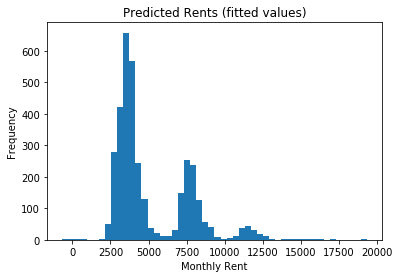

In [89]:
_ = plt.hist(lm.predict(X), bins=50)
_ = plt.title('Predicted Rents (fitted values)')
_ = plt.xlabel('Monthly Rent')
_ = plt.ylabel('Frequency')


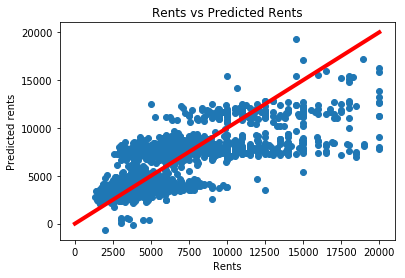

In [90]:
_ = plt.scatter(manhattan['rent'], lm.predict(X))
_ = plt.xlabel("Rents")
_ = plt.ylabel("Predicted rents")
_ = plt.title("Rents vs Predicted Rents")
_ = plt.plot([0, 20000], [0, 20000], linewidth=4, color='red')

Using Manhattan data only produces results almoust identical to our original dataset

In [91]:
X = queens[dependent_vars]

lm.fit(X, queens.rent)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
# The coefficients
pd.DataFrame(lm.coef_, index=dependent_vars,  columns = ['Est. Coefficient'])

Estimated intercept coefficient: 1369.83443014
Number of coefficients: 12


,Est. Coefficient
bedrooms,437.616599
bathrooms,580.610584
min_to_subway,-12.077830
floor,32.142364
building_age_yrs,-7.660600
no_fee,234.867971
has_roofdeck,53.853224
has_washer_dryer,127.596639
has_doorman,-10.879861
has_elevator,387.111147


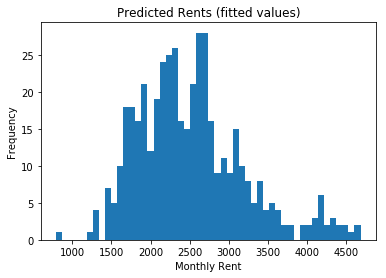

In [93]:
_ = plt.hist(lm.predict(X), bins=50)
_ = plt.title('Predicted Rents (fitted values)')
_ = plt.xlabel('Monthly Rent')
_ = plt.ylabel('Frequency')


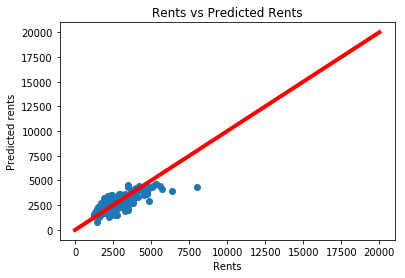

In [94]:
_ = plt.scatter(queens['rent'], lm.predict(X))
_ = plt.xlabel("Rents")
_ = plt.ylabel("Predicted rents")
_ = plt.title("Rents vs Predicted Rents")
_ = plt.plot([0, 20000], [0, 20000], linewidth=4, color='red')

In [95]:
X = brooklyn[dependent_vars]

lm.fit(X, brooklyn.rent)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
# The coefficients
pd.DataFrame(lm.coef_, index=dependent_vars,  columns = ['Est. Coefficient'])

Estimated intercept coefficient: 762.755050346
Number of coefficients: 12


,Est. Coefficient
bedrooms,350.775290
bathrooms,1677.238667
min_to_subway,-21.473965
floor,18.783333
building_age_yrs,-2.285364
no_fee,-21.627490
has_roofdeck,126.895079
has_washer_dryer,-26.364231
has_doorman,-111.405951
has_elevator,273.018973


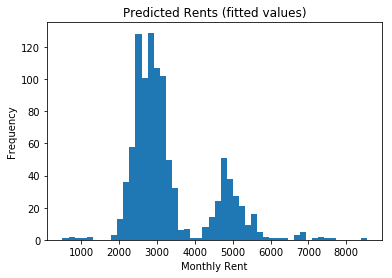

In [97]:
_ = plt.hist(lm.predict(X), bins=50)
_ = plt.title('Predicted Rents (fitted values)')
_ = plt.xlabel('Monthly Rent')
_ = plt.ylabel('Frequency')


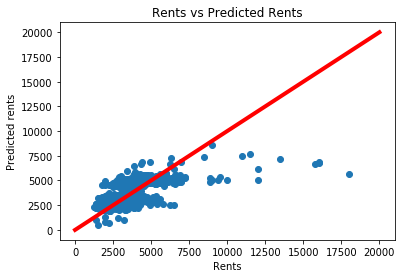

In [99]:
_ = plt.scatter(brooklyn['rent'], lm.predict(X))
_ = plt.xlabel("Rents")
_ = plt.ylabel("Predicted rents")
_ = plt.title("Rents vs Predicted Rents")
_ = plt.plot([0, 20000], [0, 20000], linewidth=4, color='red')

### Final Conclusion:
Indeed, using feature engineering helped me to produce more accurate results for each borough. The main reason for that is due to diffrent price ranges acroos different boroughs. Our model is much more reliable for Queens and Brooklyn broughs. There are less outliers. However, there is less amount of data as well.